## Step 1. 데이터 불러오기

In [5]:
import pandas as pd
import numpy as np

import yfinance as yf

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings(action='ignore')

In [6]:
stocks = yf.Ticker('TSLA')

In [7]:
df = stocks.history(start='2010-01-01', end='2022-07-08')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0,0.0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,0,0.0
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,0,0.0


## Step 2. 예측값 정의

- `up` : 전일 대비 종가 상승 여부

In [8]:
df['up'] = [1 if x >= 0 else 0 for x in df['Close'].diff()]
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,up
Date,,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0,0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0,0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0,0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0,0
...,...,...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0,0.0,0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,0,0.0,1
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,0,0.0,1


In [9]:
df['Close'].diff()

Date
2010-06-29          NaN
2010-06-30    -0.012000
2010-07-01    -0.374000
2010-07-02    -0.552000
2010-07-06    -0.618000
                ...    
2022-06-30   -12.049988
2022-07-01     8.369995
2022-07-05    17.410034
2022-07-06    -4.000000
2022-07-07    38.429993
Name: Close, Length: 3027, dtype: float64

In [10]:
df = df[['Open','High','Low','Close','Volume','up']]
df.columns = ['open','high','low','close','volume','up']
df

,open,high,low,close,volume,up
Date,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0
...,...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500,0
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500,1
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700,1


In [11]:
X = df[['open','high','low','close','volume']]
y = df['up']

In [12]:
X

,open,high,low,close,volume
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2022-06-30,673.530029,688.369995,656.590027,673.419983,31533500
2022-07-01,681.000000,690.690002,666.359985,681.789978,24781500
2022-07-05,669.000000,699.440002,648.500000,699.200012,28193700


In [13]:
y

Date
2010-06-29    0
2010-06-30    0
2010-07-01    0
2010-07-02    0
2010-07-06    0
             ..
2022-06-30    0
2022-07-01    1
2022-07-05    1
2022-07-06    0
2022-07-07    1
Name: up, Length: 3027, dtype: int64

## Step 3. 모델 학습 및 평가

In [14]:
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
print(X.shape, y.shape)

(3027, 5) (3027,)


### 3-1. 모델 인스턴스 생성

In [49]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(5,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

### 3-2. 학습 및 평가 데이터 구성

In [47]:
def show_dl_acc(X, y, model, diff=False):
    if not diff:
        X_train, X_test, y_train, y_test = train_test_split(X.iloc[:-1], 
                                                            y.iloc[1:], 
                                                            test_size=0.2, 
                                                            shuffle=True, 
                                                            random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X.iloc[1:-1], 
                                                            y.iloc[2:], 
                                                            test_size=0.2, 
                                                            shuffle=True, 
                                                            random_state=42)
    
    print(f'Model : {model.__class__.__name__}')
    history = model.fit(X_train, y_train,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_test, y_test))

    y_pred = model.predict(X_test)
    y_pred = [0 if x[0] < 0.5 else 1 for x in y_pred]
    acc = (y_pred==y_test).sum()/len(y_pred)
    print(f'Accuracy : {acc:.2f}')
    print(classification_report(y_test, y_pred))
    return acc, history

In [50]:
acc, history = show_dl_acc(X, y, model, diff=False)

Model : Sequential
Epoch 1/100
76/76 [==============================] - 1s 3ms/step - loss: 134938.1406 - accuracy: 0.5021 - val_loss: 4990.4019 - val_accuracy: 0.5083
Epoch 2/100
76/76 [==============================] - 0s 1ms/step - loss: 92734.0859 - accuracy: 0.4921 - val_loss: 15985.5020 - val_accuracy: 0.4917
Epoch 3/100
76/76 [==============================] - 0s 1ms/step - loss: 81164.8047 - accuracy: 0.4839 - val_loss: 47583.4961 - val_accuracy: 0.4917
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 71828.5469 - accuracy: 0.5021 - val_loss: 149848.1875 - val_accuracy: 0.5083
Epoch 5/100
76/76 [==============================] - 0s 1ms/step - loss: 81488.3359 - accuracy: 0.4988 - val_loss: 33117.6016 - val_accuracy: 0.4917
Epoch 6/100
76/76 [==============================] - 0s 1ms/step - loss: 79346.5000 - accuracy: 0.4913 - val_loss: 1810.5353 - val_accuracy: 0.5083
Epoch 7/100
76/76 [==============================] - 0s 1ms/step - loss: 68764.2656 - a

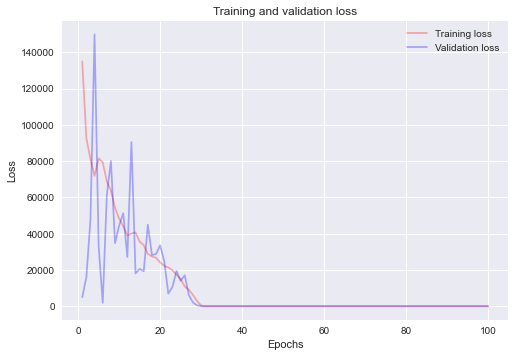

In [51]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'red', label='Training loss', alpha=0.3)  # ‘bo’는 파란색 점을 의미합니다.
plt.plot(epochs, val_loss, 'b', label='Validation loss', alpha=0.3) # ‘b’는 파란색 실선을 의미합니다.
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [52]:
print("test accuracy : {:.2f}".format(max(history_dict['val_accuracy'])))
print("test loss : {:.2f}".format(max(history_dict['val_loss'])))

test accuracy : 0.51
test loss : 149848.19
